# Классификация. Логистическая регрессия


In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Задача:

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [510]:
df = pd.read_csv('loan_data.csv', sep=',')#, index_col=0)
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [511]:
df.shape

(45000, 14)

In [512]:
df["loan_status"].unique() # - бинарная классификация

array([1, 0])

## Обработка категориальных признаков

### LabelEncoder

In [513]:
df.select_dtypes(include=['object']).columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [514]:
df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']].head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No


In [515]:
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()
df["person_gender"] = lab_encoder.fit_transform(df["person_gender"])
df["previous_loan_defaults_on_file"] = lab_encoder.fit_transform(df["previous_loan_defaults_on_file"])
df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']].head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,0,Master,RENT,PERSONAL,0
1,0,High School,OWN,EDUCATION,1
2,0,High School,MORTGAGE,MEDICAL,0
3,0,Bachelor,RENT,MEDICAL,0
4,1,Master,RENT,MEDICAL,0


In [516]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

<Axes: xlabel='person_education', ylabel='Count'>

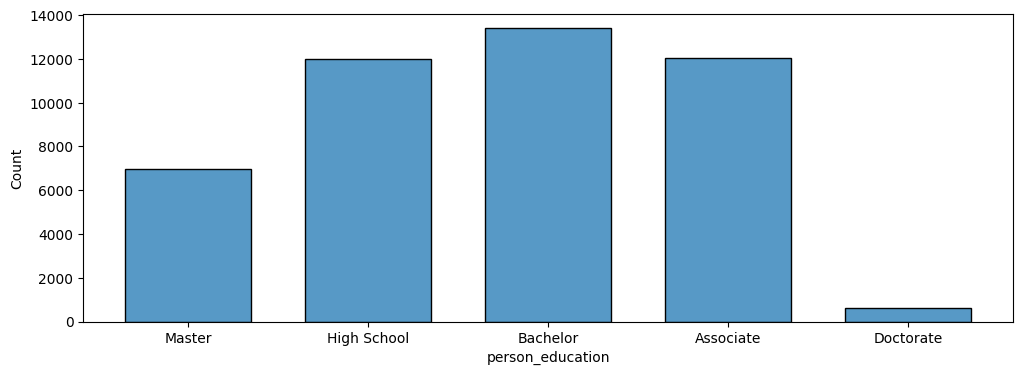

In [517]:
plt.figure(figsize=(12, 4))
sns.histplot(df['person_education'], shrink=0.7)

In [518]:
# всегда можно закодировать вручную
map_dict = {'High School' : 0,
            'Associate' : 1,
            'Bachelor': 2,
            'Master' : 3,
            'Doctorate' : 8}

df['person_education'] = df['person_education'].map(map_dict)
df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']].head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,0,3,RENT,PERSONAL,0
1,0,0,OWN,EDUCATION,1
2,0,0,MORTGAGE,MEDICAL,0
3,0,2,RENT,MEDICAL,0
4,1,3,RENT,MEDICAL,0


In [519]:
# другой способ:
"""
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']])

df["person_education"] = ord_encoder.fit_transform(df[["person_education"]])
df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']].head()
"""

'\nfrom sklearn.preprocessing import OrdinalEncoder\n\nord_encoder = OrdinalEncoder(categories = [[\'High School\', \'Associate\', \'Bachelor\', \'Master\', \'Doctorate\']])\n\ndf["person_education"] = ord_encoder.fit_transform(df[["person_education"]])\ndf[[\'person_gender\', \'person_education\', \'person_home_ownership\', \'loan_intent\', \'previous_loan_defaults_on_file\']].head()\n'

### OnehotEncoder

<Axes: xlabel='person_home_ownership', ylabel='Count'>

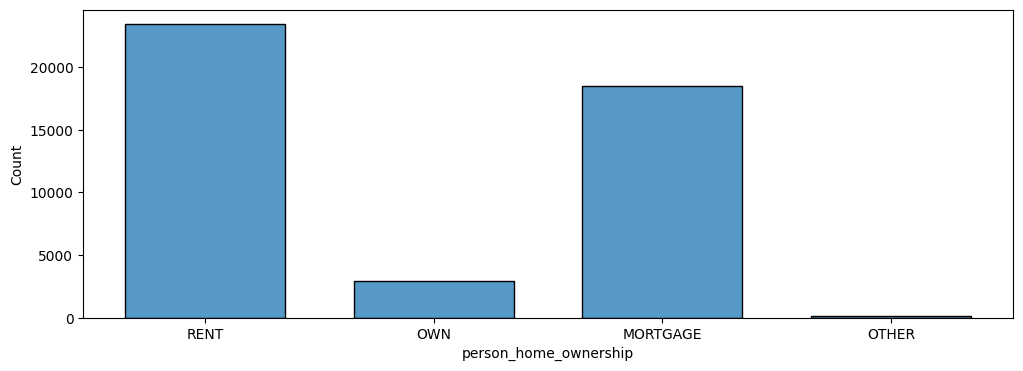

In [520]:
plt.figure(figsize=(12, 4))
sns.histplot(df['person_home_ownership'], shrink=0.7)

In [521]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
encode = onehot.fit_transform(df[['person_home_ownership']])

In [522]:
df_encoded = pd.DataFrame(encode.toarray(), columns=onehot.categories_[0])
df_encoded.head()

# можно onehot.get_feature_names_out()

,MORTGAGE,OTHER,OWN,RENT
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [523]:
df = df.join(df_encoded)  # не путать с SQL-join, в pandas это merge
                          # join - функция для слияния таблиц по индексам
df.drop('person_home_ownership', axis = 1, inplace = True) # удаляем исходный признак

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OTHER,OWN,RENT
0,22.0,0,3,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1,0.0,0.0,0.0,1.0
1,21.0,0,0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0,0.0,0.0,1.0,0.0
2,25.0,0,0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1,1.0,0.0,0.0,0.0
3,23.0,0,2,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1,0.0,0.0,0.0,1.0
4,24.0,1,3,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1,0.0,0.0,0.0,1.0


In [524]:
df = df.drop('OTHER', axis = 1) # можно удалить OTHER (почему?)

Главный недостаток One-Hot Encoder'a заключается в существенном увеличении объема данных

<Axes: xlabel='loan_intent', ylabel='Count'>

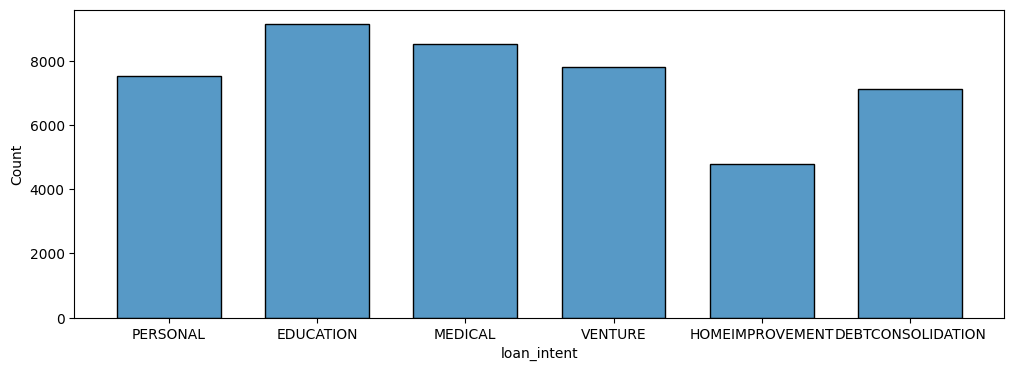

In [525]:
plt.figure(figsize=(12, 4))
sns.histplot(df['loan_intent'], shrink=0.7)

In [526]:
!pip install category_encoders

In [527]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OWN,RENT
0,22.0,0,3,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1,0.0,0.0,1.0
1,21.0,0,0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0,0.0,1.0,0.0
2,25.0,0,0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1,1.0,0.0,0.0
3,23.0,0,2,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1,0.0,0.0,1.0
4,24.0,1,3,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1,0.0,0.0,1.0


In [528]:
from category_encoders.binary import BinaryEncoder

b_encoder = BinaryEncoder()
b_encoded = b_encoder.fit_transform(df[['loan_intent']])
b_encoded.head()

,loan_intent_0,loan_intent_1,loan_intent_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,1
4,0,1,1


Недостаток - теряется интерпретируемость

<Axes: xlabel='loan_intent', ylabel='Count'>

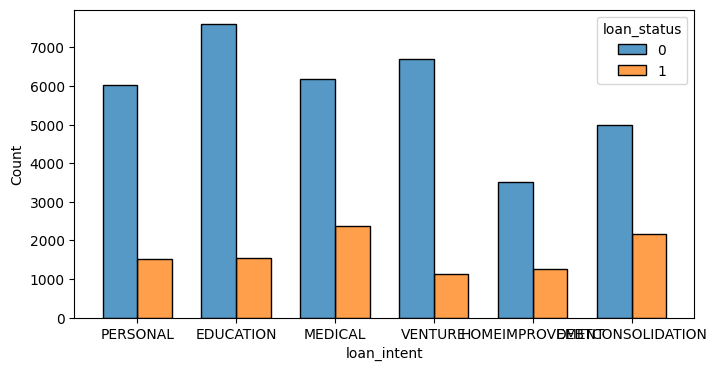

In [529]:
plt.figure(figsize=(8, 4))
sns.histplot(df, x="loan_intent", hue="loan_status", multiple="dodge", shrink=0.7)

Другая идея: использование целевой переменной

In [530]:
df.groupby(["loan_intent"]).agg({
  "loan_status": "mean"
}).reset_index()

,loan_intent,loan_status
0,DEBTCONSOLIDATION,0.302729
1,EDUCATION,0.169562
2,HOMEIMPROVEMENT,0.263015
3,MEDICAL,0.278194
4,PERSONAL,0.201404
5,VENTURE,0.144264


In [531]:
#Target Encoder для задачи регрессии использует среднее значение целевой метки по данному значению
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder()
target = target_encoder.fit_transform(df[['loan_intent']], df[['loan_status']])
target

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.20217987],
       [0.1699609 ],
       [0.27898805],
       ...,
       [0.30260026],
       [0.17495759],
       [0.29956309]])

Есть нюансы применения:
* выборка среднего применяется на тренировочной выборке
* возможна утечка данных (т.к. буквально используется целевая переменная)
  * экстремальный пример - признак с одним объектом

In [532]:
# Модификация метода - Leave-One-Out Encoder
# Кодирование среднего без учета значения данного объекта

from category_encoders import LeaveOneOutEncoder
loo_encoder = LeaveOneOutEncoder()

In [533]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [534]:
# fit только на train-выборке
loo_encoder.fit(X_train[['loan_intent']], y_train)

X_train['loan_intent'] = loo_encoder.transform(X_train[['loan_intent']])
X_test['loan_intent'] = loo_encoder.transform(X_test[['loan_intent']])

## Обучение базовой модели

Логистическая регрессия:
* Хорошо работает, если зависимость между целевой переменной и признаками имеет линейный характер
* Хорошо интерпретируется
* Перед использованием лучше провести нормализацию данных, т.к масштаб влияет на веса


In [535]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [536]:
y_pred = model.predict(X_test)

model.coef_

array([[-4.28890104e-02, -2.56700475e-03,  5.56704868e-03,
        -2.91129550e-05,  3.07137444e-02,  1.03080661e-04,
         6.53647064e-03,  3.00235551e-01,  6.79970196e-03,
         1.14995975e-02, -4.36876374e-03, -2.15207616e-01,
        -4.68815380e-02, -2.73067710e-02,  6.98203857e-02]])

## Оценка модели

Проверим результат. Воспользуемся метрикой Accuracy

In [537]:
from sklearn import metrics

# средняя абсолютная ошибка
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
#print('F1 = ', metrics.f1_score(y_test, y_pred))

Accuracy =  0.8287777777777777
F1 =  0.49983771502758845


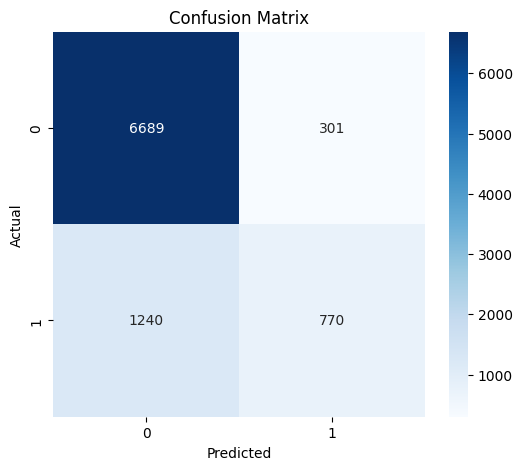

In [538]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Геометрический смысл

In [539]:
X = df[['person_age', 'person_income']]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
#print('F1 = ', metrics.f1_score(y_test, y_pred))

Accuracy =  0.7766666666666666
F1 =  0.0


In [540]:
X_train[:1]

,person_age,person_income
25180,34.0,97265.0


In [541]:
model.intercept_, model.coef_

(array([-0.13888942]), array([[ 2.71389974e-03, -1.70903724e-05]]))

In [542]:
model.intercept_ + model.coef_[0][0]*34 + model.coef_[0][1]*11.485205

array([-0.04681311])

In [543]:
1 / (1 + np.exp(-1.8823388))

np.float64(0.8678795349515459)

In [544]:
model.predict_proba(X_train[:1])

array([[0.8466951, 0.1533049]])

In [545]:
model.predict(X_train[:1])

array([0])

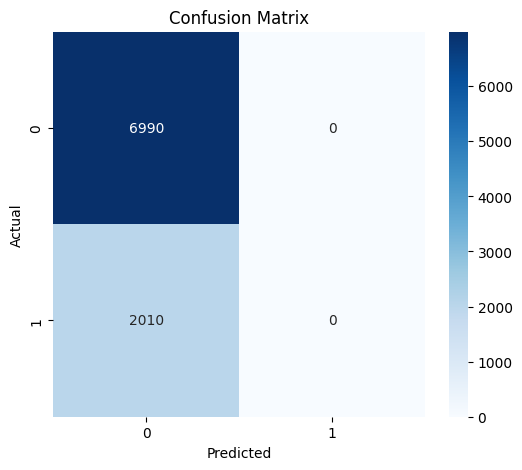

In [546]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Улучшения

In [547]:
df.drop('loan_amnt', axis = 1, inplace = True) # loan_int_rate = loan_amnt/person_income

In [548]:
onehot = OneHotEncoder()
encode = onehot.fit_transform(df[['loan_intent']])

df_encoded = pd.DataFrame(encode.toarray(), columns=onehot.categories_[0])

In [549]:
df_encoded

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
44995,0.0,0.0,0.0,1.0,0.0,0.0
44996,0.0,0.0,1.0,0.0,0.0,0.0
44997,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.0,1.0,0.0,0.0,0.0,0.0


In [550]:
df = df.join(df_encoded)
df.drop('loan_intent', axis = 1, inplace = True)

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,3,71948.0,0,16.02,0.49,3.0,561,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,0,12282.0,0,11.14,0.08,2.0,504,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,0,12438.0,3,12.87,0.44,3.0,635,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,2,79753.0,0,15.23,0.44,2.0,675,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,3,66135.0,1,14.27,0.53,4.0,586,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='person_income'>

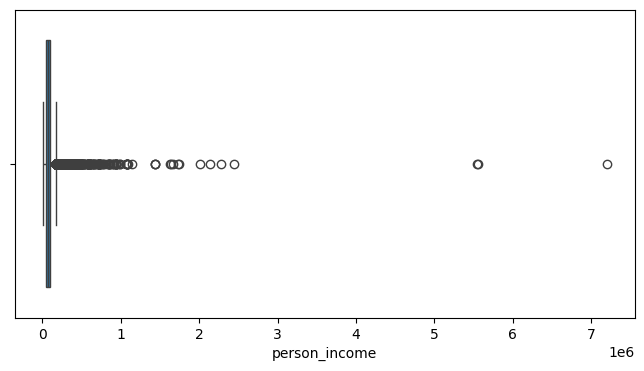

In [551]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['person_income'])

<Axes: xlabel='person_income', ylabel='Count'>

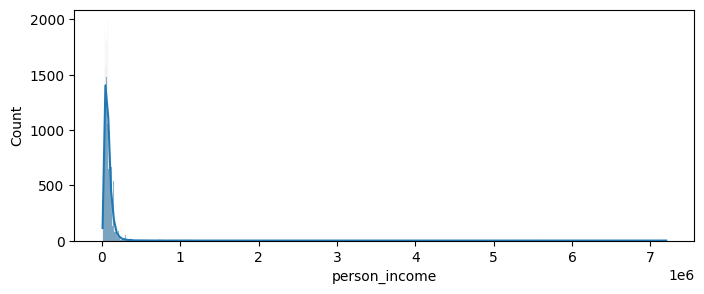

In [552]:
plt.figure(figsize=(8, 3))
sns.histplot(df, x="person_income", kde=True)

In [553]:
df.loc[:, 'person_income'] = df['person_income'].apply(np.log1p)

<Axes: xlabel='person_income', ylabel='Count'>

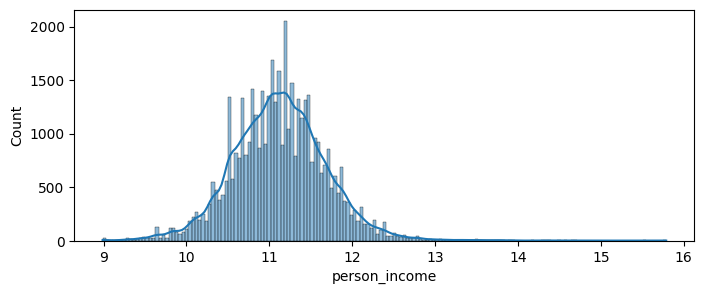

In [554]:
plt.figure(figsize=(8, 3))
sns.histplot(df, x="person_income", kde=True)

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

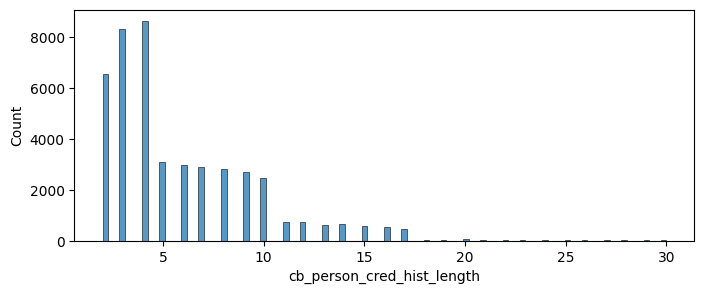

In [555]:
plt.figure(figsize=(8, 3))
sns.histplot(df, x="cb_person_cred_hist_length")

<Axes: xlabel='cred_hist', ylabel='Count'>

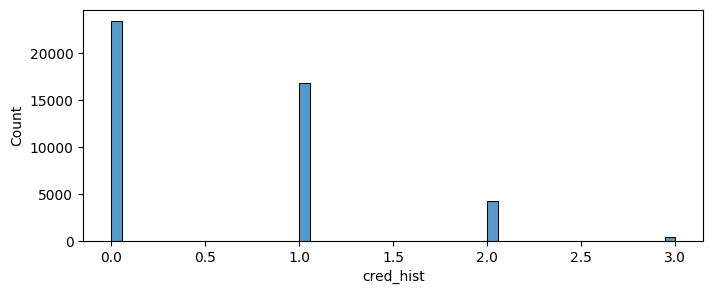

In [556]:
df.loc[df['cb_person_cred_hist_length'] >= 18, 'cred_hist'] = 3
df.loc[df['cb_person_cred_hist_length'] < 18, 'cred_hist'] = 2
df.loc[df['cb_person_cred_hist_length'] < 11, 'cred_hist'] = 1
df.loc[df['cb_person_cred_hist_length'] < 5, 'cred_hist'] = 0
df.drop('cb_person_cred_hist_length', axis = 1, inplace = True)

plt.figure(figsize=(8, 3))
sns.histplot(df, x="cred_hist")

In [557]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cred_hist
0,22.0,0,3,11.183713,0,16.02,0.49,561,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21.0,0,0,9.415971,0,11.14,0.08,504,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,0,0,9.428592,3,12.87,0.44,635,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,0,2,11.286702,0,15.23,0.44,675,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24.0,1,3,11.099469,1,14.27,0.53,586,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,10.778373,6,15.66,0.31,645,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44996,37.0,0,1,11.094390,17,14.07,0.14,621,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
44997,33.0,1,1,10.949806,7,10.02,0.05,668,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44998,29.0,1,2,10.409250,4,13.23,0.36,604,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [558]:
#мы можем измерить степень зависимости между категориальной и целевой переменной

from sklearn.metrics import mutual_info_score #взаимная информация

mutual_info_score(df['person_gender'], df['loan_status'])

np.float64(1.575349680149607e-07)

In [559]:
def mutual_score(series):
    return round(mutual_info_score(series, df['loan_status']),3)

df_mutual = df[['person_gender', 'person_education', 'previous_loan_defaults_on_file',
       'MORTGAGE', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'cred_hist']].apply(mutual_score)

df_mutual.sort_values(ascending=False)

,0
previous_loan_defaults_on_file,0.191
RENT,0.034
MORTGAGE,0.024
OWN,0.005
VENTURE,0.004
DEBTCONSOLIDATION,0.003
EDUCATION,0.002
MEDICAL,0.002
HOMEIMPROVEMENT,0.001
person_education,0.000


<Axes: xlabel='person_income'>

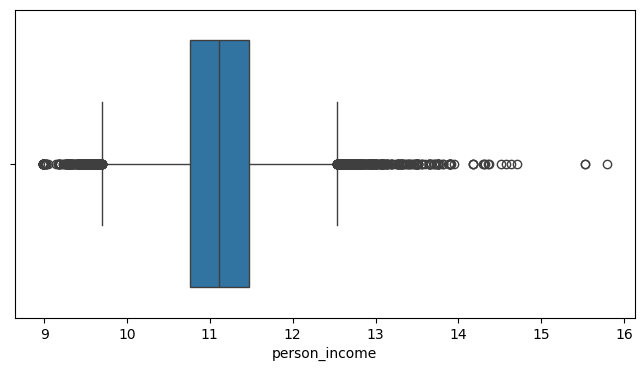

In [560]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['person_income'])

In [561]:
X = df.drop('loan_status', axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

outliers = X_train[(X_train['person_income']>15) | (X_train['person_age']>100)].index
X_train = X_train.drop(outliers, axis=0)
y_train = y_train.drop(outliers)

In [562]:
model = LogisticRegression(penalty='l2', C=5.0, max_iter=200, solver='newton-cg', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
print('F1 = ', metrics.f1_score(y_test, y_pred))

Accuracy =  0.8964444444444445
F1 =  0.7648839556004037


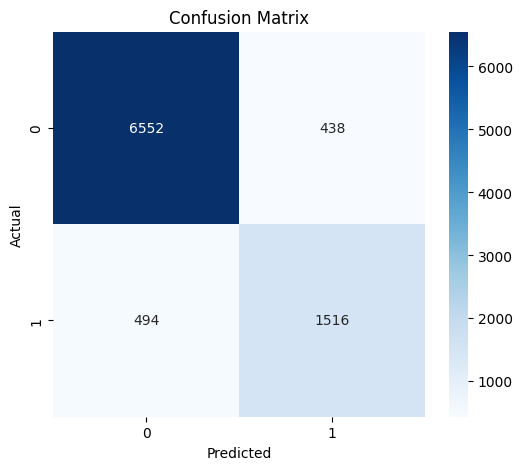

In [563]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()